In [3]:
import sys
sys.path.append('../../ml_utils')

import config as cfg
import data_utils as du
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
metrics = pd.read_csv(filepath_or_buffer='./autoencoder_selection_metrics.csv', header=0, sep=',', index_col=None)
metrics.describe()

,loss_s1,mae_s1,acc_s1,loss_s2,mae_s2,acc_s2,loss_d1,mae_d1,acc_d1,loss_d2,mae_d2,acc_d2
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.826915,0.471646,0.871488,0.832505,0.472403,0.850135,0.829259,0.472845,0.826658,0.828331,0.472912,0.788935
std,0.017223,0.002551,0.067180,0.016355,0.002460,0.086472,0.021241,0.004611,0.102222,0.024201,0.003877,0.118853
min,0.801649,0.468295,0.759650,0.807183,0.468750,0.725033,0.801047,0.467912,0.649717,0.797380,0.467711,0.531217
25%,0.811292,0.470669,0.816808,0.821347,0.470694,0.783304,0.815419,0.469621,0.752375,0.808181,0.469774,0.724358
50%,0.828581,0.471298,0.889233,0.837148,0.471507,0.855000,0.829813,0.471819,0.857492,0.827889,0.472272,0.815667
75%,0.837907,0.472013,0.915996,0.842650,0.474626,0.931171,0.838834,0.475331,0.907812,0.839713,0.475115,0.879617
max,0.850710,0.476522,0.952567,0.855143,0.475968,0.952050,0.864185,0.481296,0.940300,0.865644,0.478988,0.923600


In [12]:
frame = { 'Sparse L1': metrics["loss_s1"], 
          'Sparse L2': metrics["loss_s2"], 
          'Deep L1': metrics["loss_d1"],
          'Deep L2': metrics["loss_d2"]
        } 
  
loss_df = pd.DataFrame(frame) 
loss_df

,Sparse L1,Sparse L2,Deep L1,Deep L2
0,0.849144,0.850437,0.830052,0.864250
1,0.808217,0.840447,0.813764,0.804550
2,0.801649,0.810816,0.801727,0.807415
3,0.850710,0.838049,0.857904,0.865644
4,0.830830,0.836248,0.829573,0.837296
5,0.838938,0.843384,0.840692,0.834198
6,0.834813,0.855143,0.864185,0.840519
7,0.807998,0.807183,0.801047,0.797380
8,0.826331,0.822316,0.833259,0.810477
9,0.820518,0.821024,0.820382,0.821580


Text(0, 0.5, 'Loss')

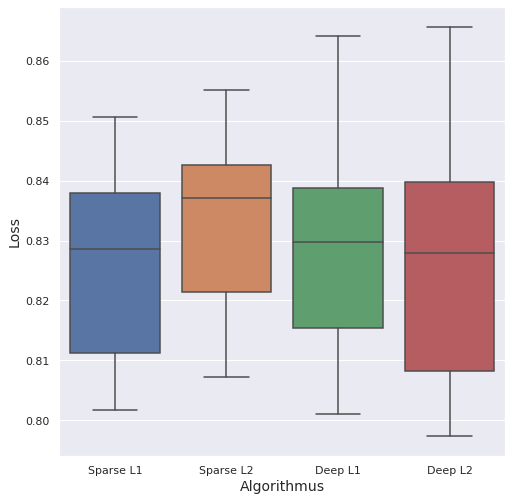

In [13]:
sns.set()
#sns.set_context("paper")

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 8,8.27


bplot = sns.boxplot( data=loss_df )
bplot.set_xlabel("Algorithmus", 
                fontsize=14)
 
bplot.set_ylabel("Loss",
                fontsize=14)

In [14]:
frame = { 'Sparse L1': metrics["mae_s1"], 
          'Sparse L2': metrics["mae_s2"], 
          'Deep L1': metrics["mae_d1"],
          'Deep L2': metrics["mae_d2"]
        }

mae_df = pd.DataFrame(frame) 
mae_df

,Sparse L1,Sparse L2,Deep L1,Deep L2
0,0.471329,0.470678,0.473405,0.475330
1,0.468762,0.474249,0.467912,0.472104
2,0.468295,0.468750,0.469562,0.469577
3,0.471308,0.470741,0.478924,0.478988
4,0.471288,0.471901,0.472898,0.478645
5,0.472241,0.474752,0.470741,0.472439
6,0.476522,0.475308,0.481296,0.474470
7,0.470598,0.471113,0.467938,0.470364
8,0.470883,0.470566,0.475973,0.467711
9,0.475230,0.475968,0.469798,0.469493


Text(0, 0.5, 'Mean Square Error')

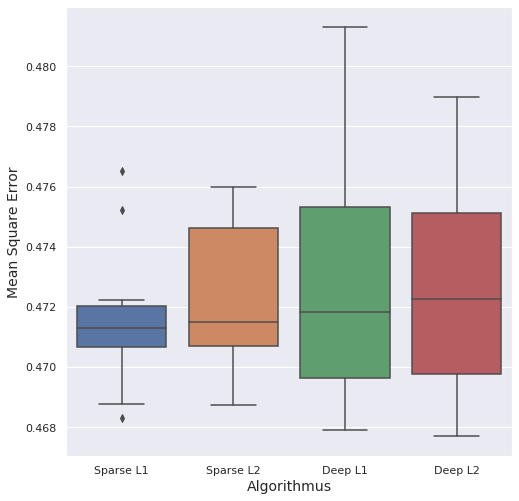

In [15]:
bplot = sns.boxplot( data=mae_df )
bplot.set_xlabel("Algorithmus", 
                fontsize=14)
 
bplot.set_ylabel("Mean Square Error",
                fontsize=14)

In [16]:
frame = { 'Sparse L1': metrics["acc_s1"], 
          'Sparse L2': metrics["acc_s2"], 
          'Deep L1': metrics["acc_d1"],
          'Deep L2': metrics["acc_d2"]
        }
  
acc_df = pd.DataFrame(frame) 
acc_df

,Sparse L1,Sparse L2,Deep L1,Deep L2
0,0.791567,0.817667,0.821533,0.709383
1,0.952567,0.725033,0.743817,0.769283
2,0.892200,0.750817,0.909517,0.869417
3,0.759650,0.937667,0.649717,0.531217
4,0.948417,0.789517,0.921283,0.688367
5,0.916983,0.952050,0.893450,0.813767
6,0.847683,0.892333,0.706217,0.817567
7,0.806517,0.781233,0.902700,0.883733
8,0.913033,0.943350,0.778050,0.923600
9,0.886267,0.911683,0.940300,0.883017


Text(0, 0.5, 'Accuracy')

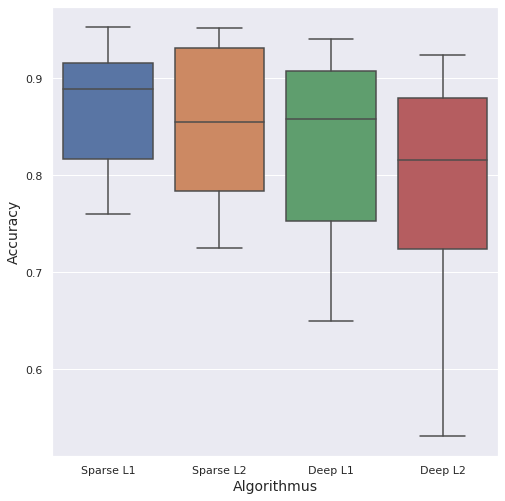

In [17]:
bplot = sns.boxplot( data=acc_df )
bplot.set_xlabel("Algorithmus", 
                fontsize=14)
 
bplot.set_ylabel("Accuracy",
                fontsize=14)